# Input variables:
   ### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [344]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [345]:
df.drop(["day", "pdays", "previous"], axis=1, inplace = True)
df.head()

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,may,1042,1,yes
1,56,admin.,married,secondary,45,no,no,unknown,may,1467,1,yes
2,41,technician,married,secondary,1270,yes,no,unknown,may,1389,1,yes
3,55,services,married,secondary,2476,yes,no,unknown,may,579,1,yes
4,54,admin.,married,tertiary,184,no,no,unknown,may,673,2,yes


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   month      11162 non-null  object
 9   duration   11162 non-null  int64 
 10  campaign   11162 non-null  int64 
 11  deposit    11162 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.0+ MB


In [347]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,deposit
DataType,int64,object,object,object,int64,object,object,object,object,int64,int64,object
NumUnique,76,12,3,4,3805,2,2,3,12,1428,36,2


In [348]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.0,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.0,63.0


In [349]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,deposit
DataType,int64,object,object,object,int64,object,object,object,object,int64,int64,object
NumUnique,76,12,3,4,3805,2,2,3,12,1428,36,2


In [350]:
null = df.isnull().sum()
ratio = (null / df.shape[0]) * 100
pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign,deposit
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [351]:
df.duplicated().sum()

np.int64(0)

In [352]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'deposit'],
      dtype='object')


In [353]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols)

Numerical Columns: Index(['age', 'balance', 'duration', 'campaign'], dtype='object')


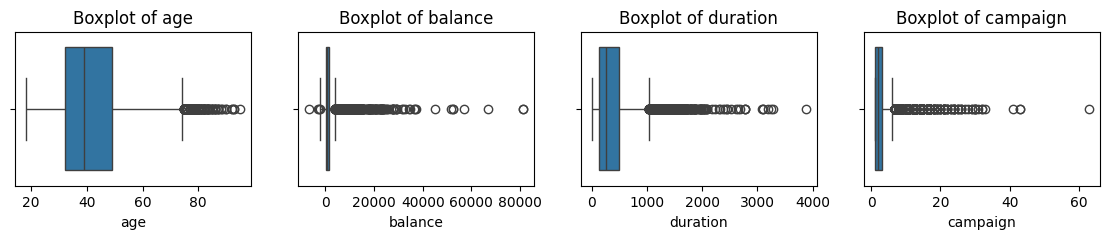

In [354]:
plt.figure(figsize=(14, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')

In [355]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_outliers = df[df[col] < lower_bound].values
    upper_outliers = df[df[col] > upper_bound].values

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


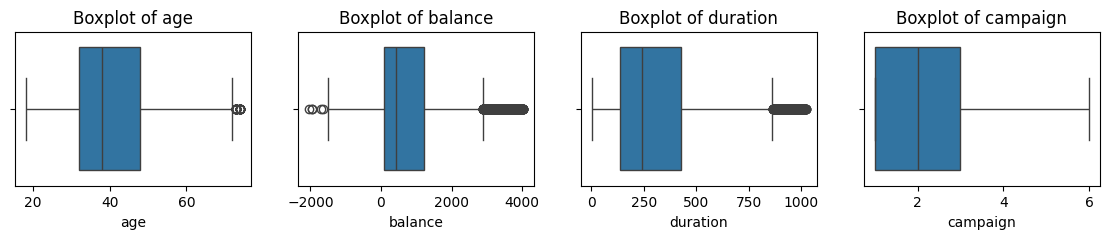

In [356]:
plt.figure(figsize=(14, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')

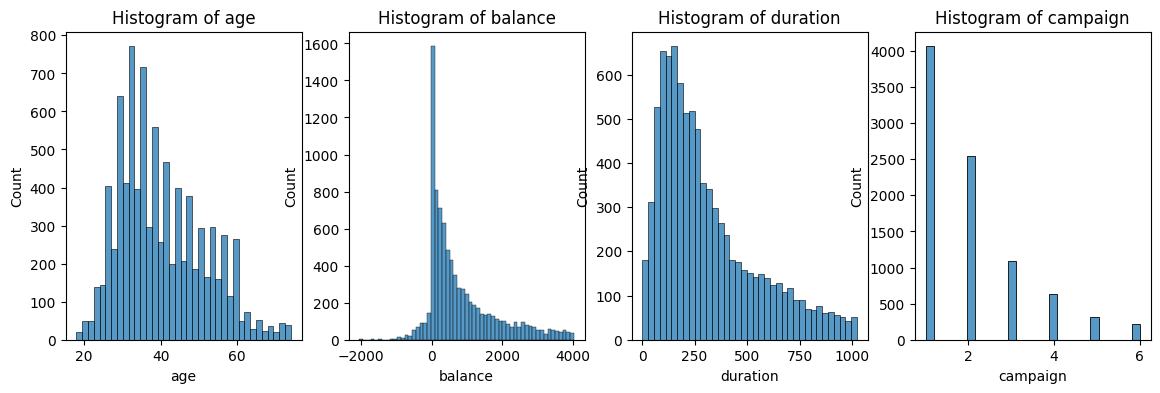

In [357]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

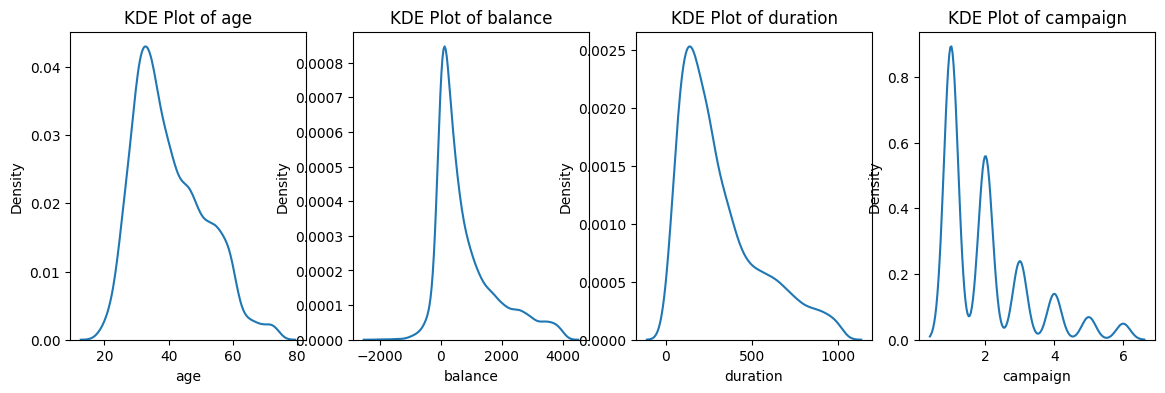

In [358]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.kdeplot(df[col])
    plt.title(f'KDE Plot of {col}')

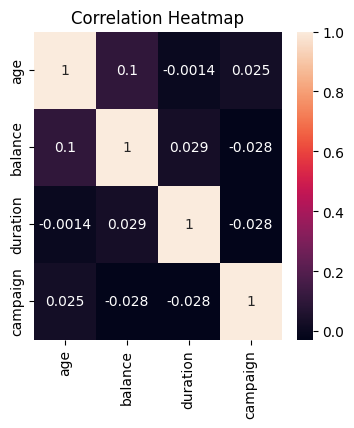

In [359]:
correlation = df[num_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

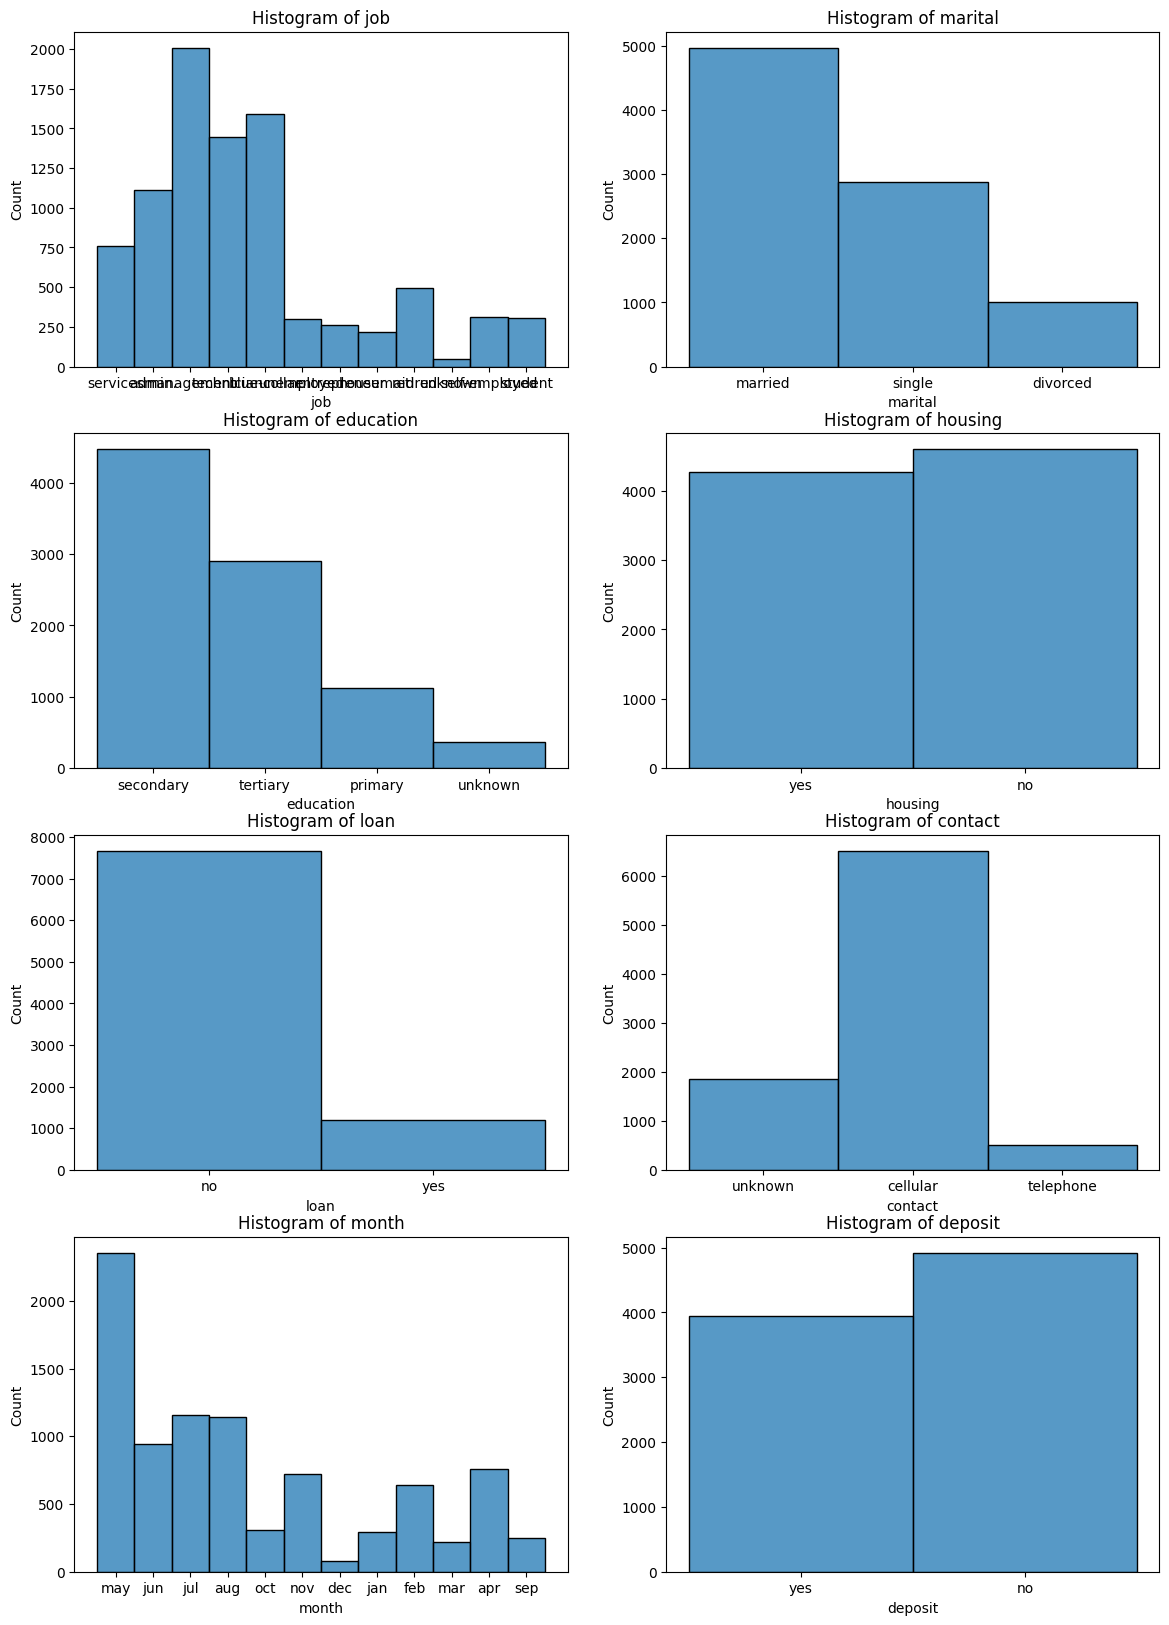

In [360]:
plt.figure(figsize=(14, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')


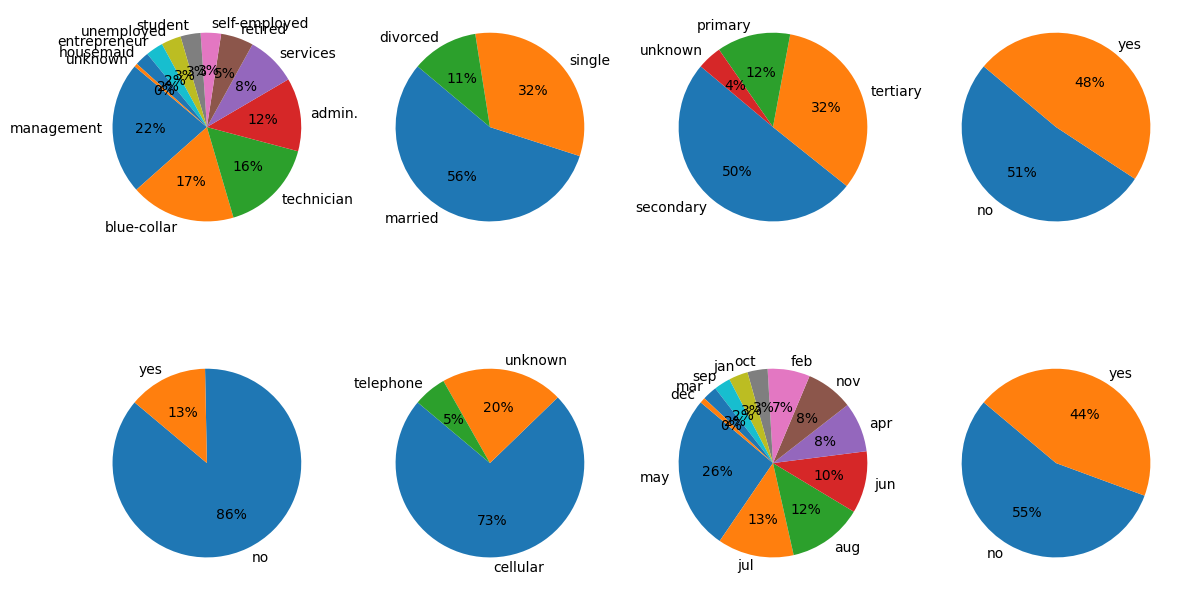

In [361]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 4, i + 1)
    unique_counts = df[col].value_counts()
    count = unique_counts.values
    categories = unique_counts.index
    plt.pie(count, labels=categories, autopct='%1.1d%%', startangle=140)

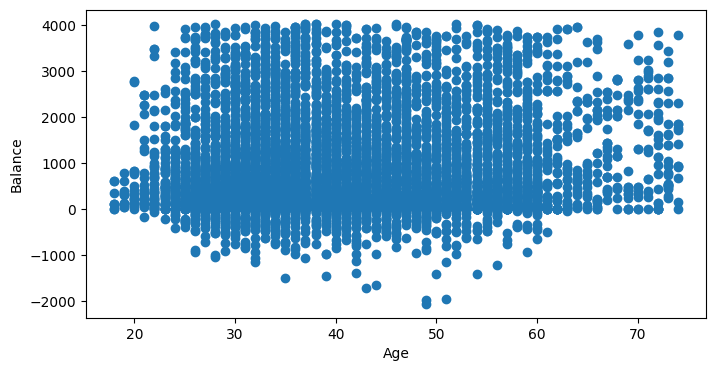

In [362]:
plt.figure(figsize=(8, 4))
plt.scatter(df["age"], df["balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()


<Figure size 800x400 with 0 Axes>

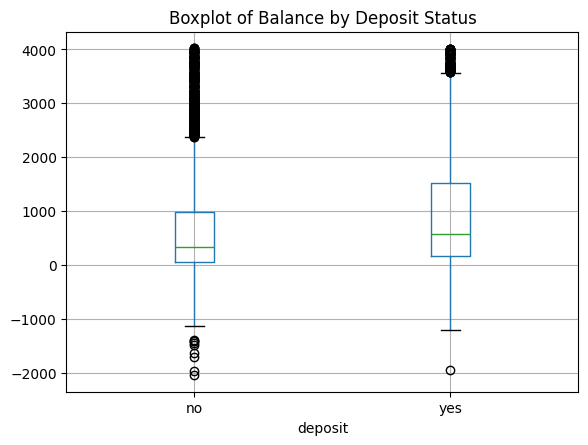

In [363]:
plt.figure(figsize=(8, 4))
df.boxplot(column="balance", by="deposit")
plt.title("Boxplot of Balance by Deposit Status")
plt.suptitle("")
plt.show()


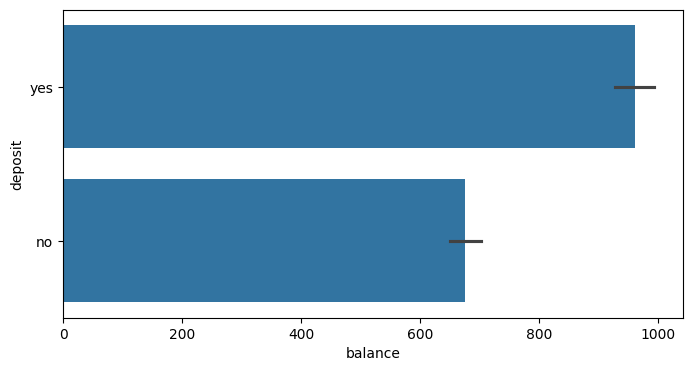

In [364]:
plt.figure(figsize=(8, 4))
sns.barplot(x="balance", y="deposit", data=df)
plt.show()

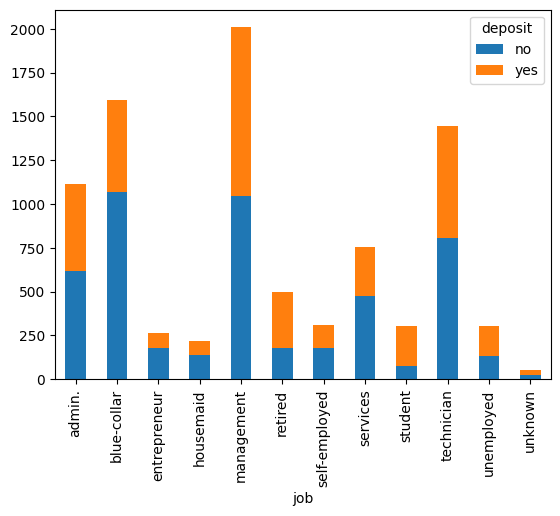

In [365]:
pd.crosstab(df["job"], df["deposit"]).plot(kind="bar", stacked=True)
plt.show()


In [366]:
from sklearn.model_selection import train_test_split

x = df.drop("deposit", axis=1)
y = df["deposit"]

In [367]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
x[num_cols] = scalar.fit_transform(x[num_cols])

In [368]:
x

,age,job,marital,education,balance,housing,loan,contact,month,duration,campaign
3,0.660714,services,married,secondary,0.744979,yes,no,unknown,may,0.565132,0.0
4,0.642857,admin.,married,tertiary,0.367633,no,no,unknown,may,0.657199,0.2
5,0.428571,management,single,tertiary,0.337339,yes,yes,unknown,may,0.548482,0.2
8,0.339286,technician,married,secondary,0.337504,yes,no,unknown,may,0.593536,0.0
10,0.357143,admin.,single,secondary,0.353803,yes,no,unknown,may,0.767875,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11157,0.267857,blue-collar,single,primary,0.337504,yes,no,cellular,apr,0.249755,0.0
11158,0.375000,services,married,secondary,0.458018,no,no,unknown,jun,0.079334,0.6
11159,0.250000,technician,single,secondary,0.342114,no,no,cellular,aug,0.150833,0.2
11160,0.446429,technician,married,secondary,0.337339,no,yes,cellular,may,0.006856,0.2


In [371]:
from category_encoders import OneHotEncoder
str_cols = x.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(cols=str_cols,use_cat_names=True,handle_unknown='value')
x = encoder.fit_transform(x)


In [373]:
x

,age,job_services,job_admin.,job_management,job_technician,job_blue-collar,job_unemployed,job_entrepreneur,job_housemaid,job_retired,...,month_oct,month_nov,month_dec,month_jan,month_feb,month_mar,month_apr,month_sep,duration,campaign
3,0.660714,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.565132,0.0
4,0.642857,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.657199,0.2
5,0.428571,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.548482,0.2
8,0.339286,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.593536,0.0
10,0.357143,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.767875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.267857,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0.249755,0.0
11158,0.375000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.079334,0.6
11159,0.250000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.150833,0.2
11160,0.446429,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.006856,0.2
